In [1]:
from itertools import cycle, islice, product 

from algorithms import * 
import warnings
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from copy import deepcopy

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_blobs

In [2]:
# function to return Xmin and ymin for rectangle parameters
def hyperbox_coordinates(uC, sizes):     
    center = uC.get_center() 
    Xmin = (center[0] - sizes[0]/2)
    ymin = (center[1] - sizes[1]/2)
    return (Xmin, ymin)

In [3]:
# Make blobs data 
X, y = make_moons(1500, random_state=8)

In [4]:
# import csv data 
#df1 = pd.read_csv("Chameleon-1.csv", sep=",")

# Create data matrix
#X = df1.values

In [5]:
# Context matrix
context = np.vstack([X.min(axis=0), X.max(axis=0)])

In [6]:
# Create dyclee class object 
dyclee = SerialDyClee(phi=0.06, context=context)

In [7]:
%%time

# Run dyclee
#dyclee.run_dataset(data=X, targetcol=y)
dyclee.run_dataset(data=X)

Wall time: 51.2 s


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 6,
 'Unclassed',
 'Unclassed',
 'Unclassed',
 'Unclassed',
 'Unclassed',
 'Unclassed',
 'Unclassed',
 14,
 13,
 'Unclassed',
 'Unclassed',
 7,
 'Unclassed',
 'Unclassed',
 5,
 'Unclassed',
 13,
 'Unclassed',
 'Unclassed',
 'Unclassed',
 4,
 'Unclassed',
 5,
 'Unclassed',
 15,
 'Unclassed',
 'Unclassed',
 'Unclassed',
 6,
 'Unclassed',
 15,
 'Unclassed',
 4,
 11,
 16,
 15,
 17,
 'Unclassed',
 'Unclassed',
 'Unclassed',
 12,
 18,
 18,
 19,
 'Unclassed',
 8,
 'Unclassed',
 20,
 'Unclassed',
 'Unclassed',
 'Unclassed',
 'Unclassed',
 14,
 0,
 'Unclassed',
 7,
 21,
 22,
 9,
 1,
 5,
 7,
 3,
 9,
 13,
 23,
 22,
 'Unclassed',
 7,
 'Unclassed',
 'Unclassed',
 4,
 'Unclassed',
 17,
 'Unclassed',
 24,
 20,
 25,
 18,
 20,
 14,
 0,
 18,
 13,
 26,
 27,
 'Unclassed',
 2,
 28,
 'Unclassed',
 14,
 24,
 17,
 'Unclassed',
 'Unclassed',
 28,
 2,
 28,
 21,
 15,
 21,
 'Unclassed',
 17,
 'Unclassed',
 'Unclassed',
 'Unclassed',
 'Unclassed',
 0,
 'U

In [8]:
# combine all clusters 
all_uC = dyclee.A_list + dyclee.O_list

print('There are',len(all_uC),'microclusters')
print('Dense & Semi-dense total:',len(dyclee.A_list))
print('Low dense total:', len(dyclee.O_list))

There are 52 microclusters
Dense & Semi-dense total: 27
Low dense total: 25


In [9]:
# create dataframe
#cluster_df = pd.DataFrame([np.append(uC.get_center(), [uC.Classk], 0) for uC in all_uC], columns=['x', 'y', 'class'])

In [10]:
# hyperbox sizes 
#sizes = dyclee._get_hyperbox_sizes()


#print("the hyperbox size is: ", sizes)
# plot microclusters
#sns.scatterplot(x='x',y='y',hue='class',data=cluster_df)
#sns.scatterplot(x='x',y='y',data=cluster_df)

# plot hyperboxes
#for uC in all_uC: 
#    xy = hyperbox_coordinates(uC, sizes)
#    plt.gca().add_patch(Rectangle(xy,sizes[0],sizes[1],linewidth=0.5,edgecolor='r',facecolor='none', clip_on=False))


<bound method Figure.tight_layout of <Figure size 360x7200 with 86 Axes>>

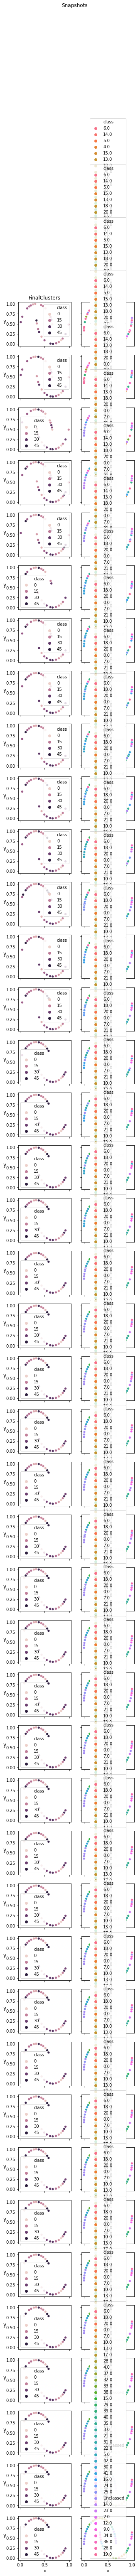

In [14]:
# plot snapshots

snapshot_ordered = {}

for order, timestamps in dyclee.snapshots.items(): 
    for timestamp, cluster_lists in timestamps.items(): 
        snapshot_ordered[timestamp] = cluster_lists
        
timestamp_order = sorted(snapshot_ordered) 

fig, axes = plt.subplots(len(timestamp_order), 2, sharex='col', sharey='row', figsize=(5,100))
fig.suptitle("Snapshots")
cols = ["FinalClusters", "MicroClusters"]
rows = deepcopy(timestamp_order)
for ax, col in zip(axes[0], cols): ax.set_title(col)
for ax, row in zip(axes[:,0], rows): ax.set_ylabel(row, rotation=0, size='large')

for i, t in enumerate(timestamp_order): 
    final_list = snapshot_ordered[t]['final']
    micro_list = snapshot_ordered[t]['all']

    # plot final cluster
    final_df = pd.DataFrame([np.append(uC.center, [uC.label], 0) for uC in final_list], columns=['x', 'y', 'class'])
    sns.scatterplot(ax=axes[i][0], x='x',y='y',hue='class',data=final_df)
    #axes[i][0].set_title('final')
    
    # plot micro clusters 
    micro_df = pd.DataFrame([np.append(uC.center, [uC.Classk], 0) for uC in micro_list], columns=['x', 'y', 'class'])
    sns.scatterplot(ax=axes[i][1], x='x',y='y',hue='class',data=micro_df)
    #axes[i][1].set_title('micro')

fig.tight_layout